# Vizualizace dat

In [1]:
%matplotlib inline

In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set(style='white')

## Načtení dat

In [4]:
d1 = pd.read_csv('data/data1.csv', sep=';', header=None)
print('rows, columns:', d1.shape)
d1.head()

rows, columns: (45294, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,745.7500
1,3.3165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,6.8596
2,3.1165,3.2245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,963.6320
3,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.6056,0.8631,0.7774,0.0605,0.4959,0.2765,16.6728
4,3.1165,3.0245,2.5679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,436.2930


In [5]:
n = 13  # number of inputs
input_indices = list(range(n))
x = d1[input_indices]
y = d1[n]

## Rozložení funkčních hodnot

In [6]:
y.min(), y.max()

(0.079799999999999996, 104797.0)

In [7]:
y.mean(), y.std()

(7.6842392789331919, 495.86824198209831)

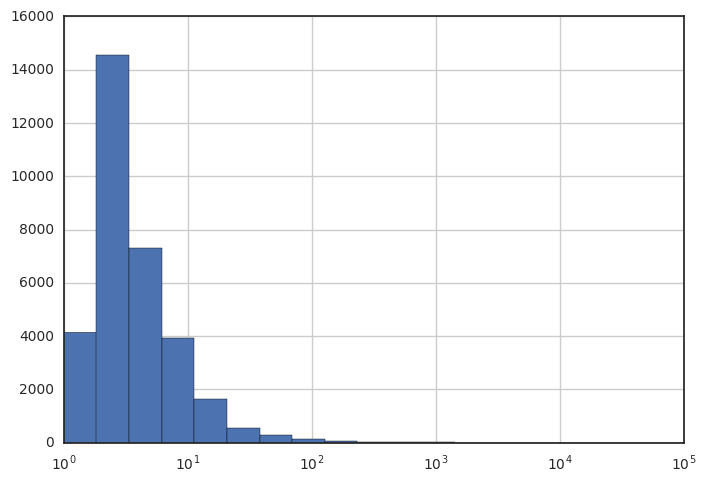

In [8]:
y.hist(bins=np.logspace(0, 5, 20))
plt.gca().set_xscale('log')

Téměř všechny funkční hodnoty jsou menší než 100, ale je tam i pár větších, a právě ty nás zajímají. Podívejme se tedy na histogram funkčních hodnot větších než 100, těch už jsou řádově jen desítky.

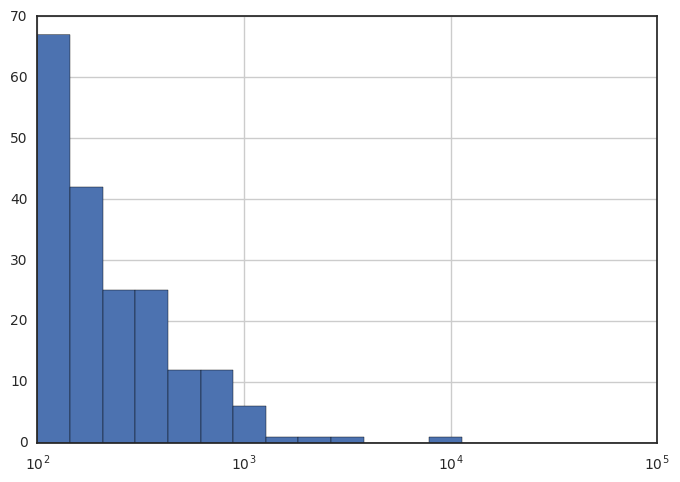

In [9]:
y.hist(bins=np.logspace(2, 5, 20))
plt.gca().set_xscale('log')

## Vliv vstupních dimenzí na velikost funkční hodnoty

Následující graf zobzrahuje heatmapu funkčních hodnot pro každý pár vstupních dimenzí (modrá = nejmenší funkční hodnoty, žlutá = největší). Na diagonále je pak zachycena závislost funkčních hodnot na jediné dimenzi (tj. scatter plot bodů (x, f(x)) pro danou dimenzi x).

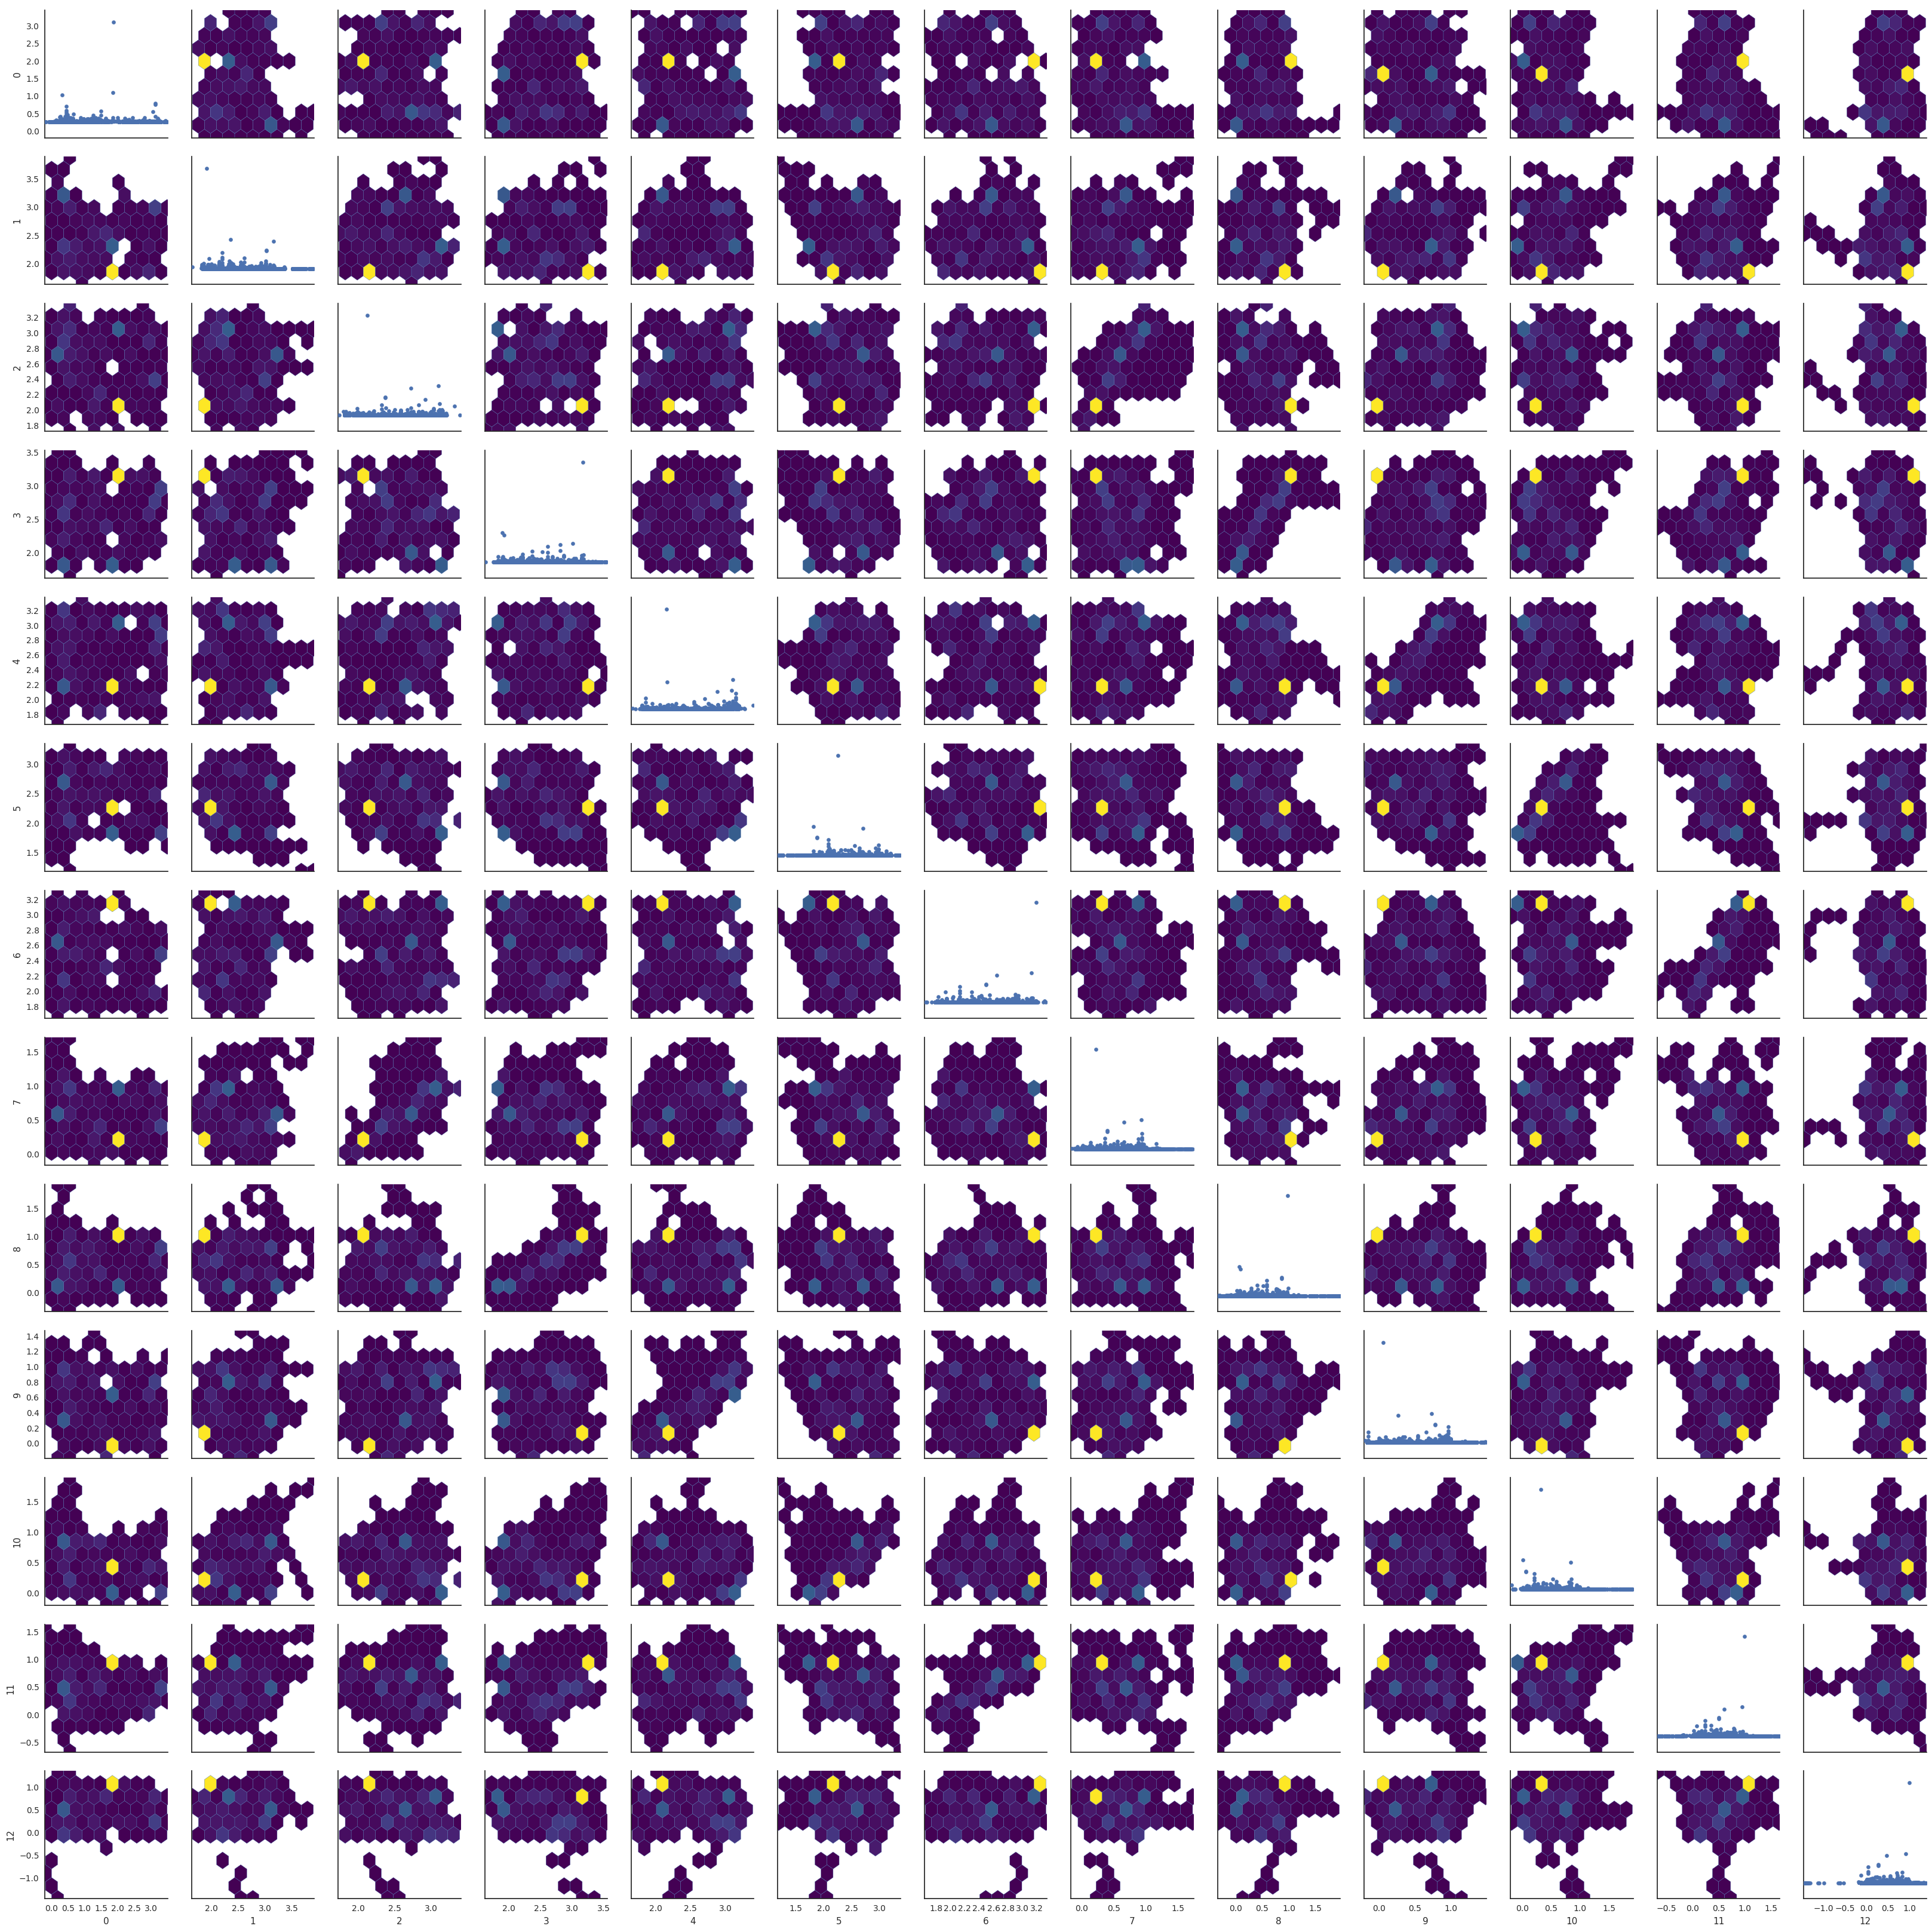

In [55]:
ds = d1.sample(10000)
g = sns.PairGrid(ds, vars=input_indices)
g = g.map_diag(plt.scatter, y=ds[n])
g = g.map_offdiag(plt.hexbin, C=ds[n], reduce_C_function=np.max, gridsize=10, cmap='viridis')